In [26]:
################################################################################
# Split and save dataset
################################################################################

import os
import pandas as pd

def get_ns(sample_size, n_classes):
    base_size = sample_size // n_classes
    remainder = sample_size % n_classes
    groups = [base_size + 1] * remainder + [base_size] * (n_classes - remainder)
    return groups

df = pd.read_csv(os.getcwd() + '/data/population.csv', low_memory=False)

# Get sample df such that each class has equal number of samples
sample_size = 10000
sample_df = pd.DataFrame(columns=df.columns)
attack_types = {
    "Normal": ["Normal"], 
    "DDoS": ["DDoS_HTTP", "DDoS_TCP", "DDoS_UDP", "DDoS_ICMP"], 
    "Injection": ["Uploading", "SQL_injection", "XSS"], 
    "MITM": ["MITM"], 
    "Malware": ["Ransomware", "Password", "Backdoor"], 
    "Scanning": ["Fingerprinting", "Port_Scanning", "Vulnerability_scanner"]
}
ns = get_ns(sample_size-400, len(attack_types))
print("Number of samples per class: ", ns)

for i, (category, types) in enumerate(attack_types.items()):
    sample_df = pd.concat([sample_df, df[df['Attack_type'].isin(types)].sample(n=ns[i], random_state=42)])

# sample_df = pd.concat([sample_df, df[df['Attack_type'] == "MITM"].sample(n=400, random_state=42)])

print("Length of sample dataset: ", len(sample_df))
sample_df.to_csv(os.getcwd() + f'/data/sample-{sample_size}-6.csv', index=False)

Number of samples per class:  [1920, 1920, 1920, 1920, 1920]
Length of sample dataset:  10000


/tmp/ipykernel_878181/3952159878.py:31: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  sample_df = pd.concat([sample_df, df[df['Attack_type'].isin(types)].sample(n=ns[i], random_state=42)])


Text(0.5, 1.0, 'Record Count')

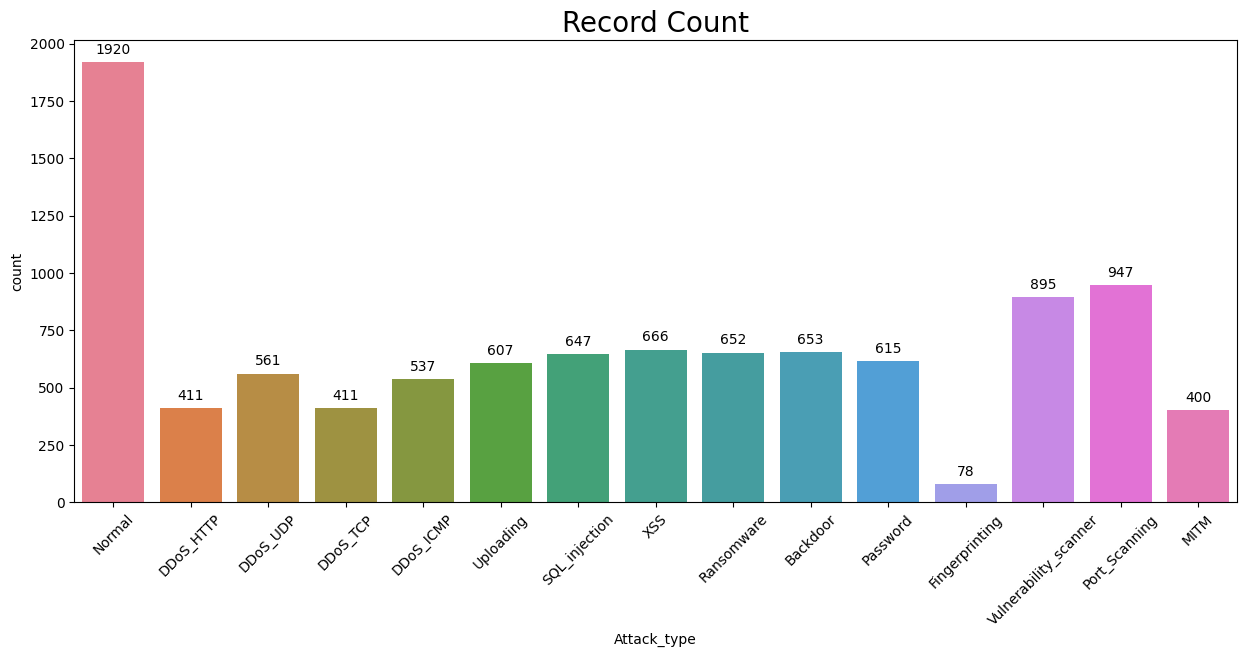

In [27]:
################################################################################
# Class distribution
################################################################################

import matplotlib.pyplot as plt
import seaborn as sns
import os
import pandas as pd

sample_size = 10000

saved_sample_df = pd.read_csv(os.getcwd() + f'/data/sample-{sample_size}-6.csv', low_memory=False)

plt.figure(figsize=(15, 6))
plt.xticks(rotation=45)
s = sns.countplot(data=saved_sample_df, x='Attack_type', hue='Attack_type')
for p in s.patches:
    s.annotate(format(p.get_height(), '.0f'), 
               (p.get_x() + p.get_width() / 2., p.get_height()), 
               ha = 'center', va = 'center', 
               xytext = (0, 9), 
               textcoords = 'offset points')
plt.title('Record Count', fontsize=20)

In [35]:
################################################################################
# Load dataset and split it into training and test set
################################################################################

import pandas as pd
import os
from tabulate import tabulate

sample_size = 1000

# Load dateset
df = pd.read_csv(os.getcwd() + f'/data/sample-{sample_size}-6.csv')

# Split dataset according to attack type
normal_df = df[df['Attack_type'].isin(["Normal"])]
ddos_df = df[df['Attack_type'].isin(["DDoS_HTTP", "DDoS_TCP", "DDoS_UDP", "DDoS_ICMP"])]
injection_df = df[df['Attack_type'].isin(["Uploading", "SQL_injection", "XSS"])]
mitm_df = df[df['Attack_type'].isin(["MITM"])]
malware_df = df[df['Attack_type'].isin(["Ransomware", "Password", "Backdoor"])]
scanning_df = df[df['Attack_type'].isin(["Fingerprinting", "Port_Scanning", "Vulnerability_scanner"])]

# Drop columns
normal_df = normal_df.drop(columns=['Attack_label', 'Attack_type'])
ddos_df = ddos_df.drop(columns=['Attack_label', 'Attack_type'])
injection_df = injection_df.drop(columns=['Attack_label', 'Attack_type'])
mitm_df = mitm_df.drop(columns=['Attack_label', 'Attack_type'])
malware_df = malware_df.drop(columns=['Attack_label', 'Attack_type'])
scanning_df = scanning_df.drop(columns=['Attack_label', 'Attack_type'])

# Split dataset into training and test set
normal_df_train = normal_df.sample(frac=0.8, random_state=42)
normal_df_test = normal_df.drop(normal_df_train.index)
ddos_df_train = ddos_df.sample(frac=0.8, random_state=42)
ddos_df_test = ddos_df.drop(ddos_df_train.index)
injection_df_train = injection_df.sample(frac=0.8, random_state=42)
injection_df_test = injection_df.drop(injection_df_train.index)
mitm_df_train = mitm_df.sample(frac=0.8, random_state=42)
mitm_df_test = mitm_df.drop(mitm_df_train.index)
malware_df_train = malware_df.sample(frac=0.8, random_state=42)
malware_df_test = malware_df.drop(malware_df_train.index)
scanning_df_train = scanning_df.sample(frac=0.8, random_state=42)
scanning_df_test = scanning_df.drop(scanning_df_train.index)

# Print dataset sizes in a table
data = [
    ["Normal", normal_df.shape[0], normal_df_train.shape[0], normal_df_test.shape[0]],
    ["DDoS", ddos_df.shape[0], ddos_df_train.shape[0], ddos_df_test.shape[0]],
    ["Injection", injection_df.shape[0], injection_df_train.shape[0], injection_df_test.shape[0]],
    ["MITM", mitm_df.shape[0], mitm_df_train.shape[0], mitm_df_test.shape[0]],
    ["Malware", malware_df.shape[0], malware_df_train.shape[0], malware_df_test.shape[0]],
    ["Scanning", scanning_df.shape[0], scanning_df_train.shape[0], scanning_df_test.shape[0]]
]
print(tabulate(data, headers=["Atack type", "Total", "Train", "Test"], tablefmt="grid"))

+--------------+---------+---------+--------+
| Atack type   |   Total |   Train |   Test |
+==============+=========+=========+========+
| Normal       |     167 |     134 |     33 |
+--------------+---------+---------+--------+
| DDoS         |     167 |     134 |     33 |
+--------------+---------+---------+--------+
| Injection    |     167 |     134 |     33 |
+--------------+---------+---------+--------+
| MITM         |     167 |     134 |     33 |
+--------------+---------+---------+--------+
| Malware      |     166 |     133 |     33 |
+--------------+---------+---------+--------+
| Scanning     |     166 |     133 |     33 |
+--------------+---------+---------+--------+


In [29]:
################################################################################
# Add documents to vector store
################################################################################

from langchain_huggingface.embeddings import HuggingFaceEmbeddings
from langchain_chroma import Chroma
from langchain_core.documents import Document
from tqdm import tqdm

# Initialize embeddings
embeddings = HuggingFaceEmbeddings()

# Initialize vector store
vector_store = Chroma(
    collection_name="edge-iiotset",
    embedding_function=embeddings, 
    persist_directory=f"./vector-stores/chroma-db-{sample_size}-6")

# Set datasets
datasets = {
    "Normal": normal_df_train, 
    "DDoS": ddos_df_train, 
    "Injection": injection_df_train, 
    "MITM": mitm_df_train, 
    "Malware": malware_df_train, 
    "Scanning": scanning_df_train
}

# Add batched documents to vector store
batch_size = 16
for attack_type, dataset in datasets.items():
    total_documents = dataset.shape[0]
    for i in tqdm(range(0, total_documents, batch_size), ncols=100, desc=f"Adding {attack_type} documents to vector store"):
        documents = [Document(page_content=str(dataset.iloc[i+j].to_list()), metadata={"source": "edge-iiotset", "label": attack_type}) for j in range(min(batch_size, total_documents-i))]
        vector_store.add_documents(documents)
    print(f"Added {total_documents} {attack_type} documents to vector store")

/opt/home/s4025371/anaconda3/envs/llm/lib/python3.10/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
Adding Normal documents to vector store: 100%|██████████████████████| 96/96 [09:36<00:00,  6.00s/it]


Added 1536 Normal documents to vector store


Adding DDoS documents to vector store: 100%|████████████████████████| 96/96 [10:07<00:00,  6.32s/it]


Added 1536 DDoS documents to vector store


Adding Injection documents to vector store: 100%|███████████████████| 96/96 [12:15<00:00,  7.67s/it]


Added 1536 Injection documents to vector store


Adding MITM documents to vector store: 100%|████████████████████████| 20/20 [01:47<00:00,  5.36s/it]


Added 320 MITM documents to vector store


Adding Malware documents to vector store: 100%|█████████████████████| 96/96 [10:35<00:00,  6.62s/it]


Added 1536 Malware documents to vector store


Adding Scanning documents to vector store: 100%|████████████████████| 96/96 [13:50<00:00,  8.65s/it]

Added 1536 Scanning documents to vector store


In [36]:
################################################################################
# Predict from Vector Store
################################################################################

from langchain_huggingface.embeddings import HuggingFaceEmbeddings
from langchain_chroma import Chroma
from statistics import mode
from sklearn.metrics import classification_report, confusion_matrix
from tqdm import tqdm

embeddings = HuggingFaceEmbeddings()

vector_store = Chroma(
    collection_name="edge-iiotset",
    embedding_function=embeddings, 
    persist_directory=f"./vector-stores/chroma-db-{sample_size}-6")

retriever = vector_store.as_retriever(
    search_type="mmr", 
    search_kwargs={"k": 5, "fetch_k": 5})

datasets = {
    "Normal": normal_df_test, 
    "DDoS": ddos_df_test, 
    "Injection": injection_df_test, 
    "MITM": mitm_df_test, 
    "Malware": malware_df_test, 
    "Scanning": scanning_df_test
}

y_pred = []
y_true = []

for attack_type, dataset in datasets.items():
    test_set_size = dataset.shape[0]
    for i in tqdm(range(test_set_size), ncols=100, desc=f"Predicting {attack_type} entries..."):
        query_document = str(dataset.iloc[i].to_list())
        similar_documents = retriever.invoke(query_document, filter={"source": "edge-iiotset"})
        y_true.append(attack_type)
        y_pred.append(mode([doc.metadata["label"] for doc in similar_documents]))

c_report = classification_report(y_true, y_pred)
c_matrix = confusion_matrix(y_true, y_pred)

with open(f"results/result-{sample_size}-6.txt", "w") as f:
    f.write(f"Classication Report\n{c_report}\n\nConfusion Matrix\n{c_matrix}")

print(c_report)
print(c_matrix)

/opt/home/s4025371/anaconda3/envs/llm/lib/python3.10/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
Predicting Scanning entries...: 100%|███████████████████████████████| 33/33 [00:13<00:00,  2.36it/s]

              precision    recall  f1-score   support

        DDoS       0.97      0.91      0.94        33
   Injection       0.68      0.70      0.69        33
        MITM       1.00      1.00      1.00        33
     Malware       0.76      0.79      0.78        33
      Normal       1.00      1.00      1.00        33
    Scanning       0.94      0.94      0.94        33

    accuracy                           0.89       198
   macro avg       0.89      0.89      0.89       198
weighted avg       0.89      0.89      0.89       198

[[30  3  0  0  0  0]
 [ 1 23  0  7  0  2]
 [ 0  0 33  0  0  0]
 [ 0  7  0 26  0  0]
 [ 0  0  0  0 33  0]
 [ 0  1  0  1  0 31]]
